### 5.3.2020
####  TO DO:
* Tune the gruppen plot
* Control of Merge of the factors and stocks for over/underlapping
* Control of NANs being dropped
* Move from daily to monthly data 
* Load the factors without having both daily and mothly factors = Error

### Remaining Datacamp T&T to apply:

# Content:

1. Import Packages
2. Scrapping Stocks + Visualize
3. ARIMA
4. Factors
5. Regression
6. LSTM - simple time series
7. LSTM - time series + factors

# 1. Import Packages

In [37]:

# 1.) General
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  
import numpy as np
import math
from pandas import DataFrame
from math import sqrt
from datetime import datetime
import csv

# 2.) Scrapping
import requests                  # for robots check
import lxml.html as lh
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains      # ?????
from time import sleep

# 3.) ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# 5.) Regression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 6.) LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# 2. Scrapping Stocks + Visualize

In [4]:
print(requests.get("https://finance.yahoo.com/robots.txt").text)

User-agent: *
Sitemap: https://finance.yahoo.com/sitemap_en-us_desktop_index.xml
Sitemap: https://finance.yahoo.com/sitemaps/finance-sitemap_index_US_en-US.xml.gz
Sitemap: https://finance.yahoo.com/sitemaps/finance-sitemap_googlenewsindex_US_en-US.xml.gz
Disallow: /m/
Disallow: /r/
Disallow: /__rapidworker-1.2.js
Disallow: /__blank
Disallow: /_td_api
Disallow: /_remote



### Data Download

In [24]:

def data_dwn(stocks):

    browser = webdriver.Chrome()

    for i in stocks:

        url = "https://finance.yahoo.com/quote/" + str(i) + "/history?period1=10104800&period2=1577919600&interval=1d&filter=history&frequency=1d"
                                # This time period corresponds to all the history up to the 31.12.2019
        browser.get(url)

        # This part Can click on the OK button in case of pop-up warning
        try:
            play = browser.find_elements_by_xpath('/html/body/div/div/div/form/div/button[2]')[0]
            hover = ActionChains(browser).move_to_element(play)
            hover.perform()
            play.click()

        except:
            pass
        
        sleep(5)    # 5 sec seems to be the lowest value nescessary for the page to load prperly and scrap the data
        
        play = browser.find_elements_by_xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[2]/span[2]')[0]
        hover = ActionChains(browser).move_to_element(play)
        hover.perform()
        play.click()
        
############## DATA: ##############

stocks = ["AAPL", "AMZN", "FB", "GOOG","NFLX", "NKE", "SBUX", "TSLA", "XIACF"]
#stocks = ["ATVI", "BABA", "AAL", "T","BIDU", "BB", "BKNG", "CAJ", "CSCO"]
#stocks = ["CLDR", "KO", "CROX", "DELL", "DAL", "DBX", "EBAY", "EA", "XOM"]

############## EXECUTION: ##############

#data_dwn(stocks)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=80.0.3987.122)


### Data import + merge

In [27]:

def load_all_csv(path, price, stocks):
    
    data = pd.DataFrame()
    
    for i in stocks:
    
        df = pd.read_csv(path + i + '.csv')
        df = df[["Date", price]]
        df = pd.DataFrame(df, columns= ["Date", price])
        df.columns = ["Date " + i , i]
        df = df.iloc[::-1]                        # Changing of the order - newest first
        df.reset_index(drop = True,inplace=True)
        
        data = pd.concat([data, df], axis=1)
        df = data
    
    return df

############## DATA: ##############

path = "C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/stocks/"
price = "Close"
stocks = ["AAPL", "AMZN", "FB", "GOOG","NFLX", "NKE", "SBUX", "TSLA", "XIACF"]
#stocks = ["ATVI", "BABA", "AAL", "T","BIDU", "BB", "BKNG", "CAJ", "CSCO"]
#stocks = ["CLDR", "KO", "CROX", "DELL", "DAL", "DBX", "EBAY", "EA", "XOM"]

############## EXECUTION: ##############

#data = load_all_csv(path, price, stocks)

,Date ATVI,ATVI,Date BABA,BABA,Date AAL,AAL,Date T,T,Date BIDU,BIDU,Date BB,BB,Date BKNG,BKNG,Date CAJ,CAJ,Date CSCO,CSCO
0,2019-12-31,59.419998,2019-12-31,212.100006,2019-12-31,28.680000,2019-12-31,39.080002,2019-12-31,126.400002,2019-12-31,6.42,2019-12-31,2053.729980,2019-12-31,27.350000,2019-12-31,47.959999
1,2019-12-30,58.880001,2019-12-30,212.910004,2019-12-30,28.299999,2019-12-30,39.040001,2019-12-30,126.290001,2019-12-30,6.42,2019-12-30,2053.870117,2019-12-30,27.299999,2019-12-30,47.590000
2,2019-12-27,59.189999,2019-12-27,215.470001,2019-12-27,28.440001,2019-12-27,39.240002,2019-12-27,126.449997,2019-12-27,6.45,2019-12-27,2072.540039,2019-12-27,27.400000,2019-12-27,47.770000
3,2019-12-26,58.889999,2019-12-26,216.380005,2019-12-26,29.670000,2019-12-26,39.160000,2019-12-26,127.580002,2019-12-26,6.43,2019-12-26,2064.320068,2019-12-26,28.110001,2019-12-26,47.849998
4,2019-12-24,58.810001,2019-12-24,214.259995,2019-12-24,29.180000,2019-12-24,38.959999,2019-12-24,128.490005,2019-12-24,6.36,2019-12-24,2044.000000,2019-12-24,28.000000,2019-12-24,47.779999
5,2019-12-23,58.889999,2019-12-23,214.830002,2019-12-23,29.299999,2019-12-23,39.070000,2019-12-23,128.830002,2019-12-23,6.47,2019-12-23,2032.099976,2019-12-23,28.100000,2019-12-23,48.099998
6,2019-12-20,59.220001,2019-12-20,212.250000,2019-12-20,29.040001,2019-12-20,39.150002,2019-12-20,127.489998,2019-12-20,6.53,2019-12-20,2023.260010,2019-12-20,28.120001,2019-12-20,47.450001
7,2019-12-19,59.130001,2019-12-19,210.130005,2019-12-19,28.549999,2019-12-19,38.930000,2019-12-19,128.070007,2019-12-19,5.81,2019-12-19,2003.119995,2019-12-19,28.270000,2019-12-19,47.880001
8,2019-12-18,59.020000,2019-12-18,210.000000,2019-12-18,28.000000,2019-12-18,38.740002,2019-12-18,126.690002,2019-12-18,5.65,2019-12-18,1991.510010,2019-12-18,28.400000,2019-12-18,46.639999
9,2019-12-17,58.259998,2019-12-17,208.179993,2019-12-17,28.280001,2019-12-17,38.500000,2019-12-17,123.839996,2019-12-17,5.71,2019-12-17,2001.869995,2019-12-17,28.190001,2019-12-17,46.439999


### Date + Turn Back

In [28]:

def date_all(df):

    df["Date"] = np.nan
    df["Date2"] = np.nan

    for i in stocks:
        if df["Date " + i].isnull().iloc[len(df)-1] + 1 == 1:

            df["Date"] = df["Date " + i]

    # Note:
    # When testing a value, 0 = False, 1 = True
    # But if i Add + to each result creating 1/2, then 1 stands  no longer for True

    df["Date2"] = df["Date"]

    df = df.iloc[:, 1:2+len(stocks)*2:2]
    
    df = df.iloc[::-1]       # Turning back, Oldest First
    df.reset_index(drop = True,inplace=True)

    return df

############## DATA: ##############

data = data

############## EXECUTION: ##############

#data = date_all(data)

### Difference = Return

In [30]:

def diff_returns(df):
    for i in stocks:
        df["Returns " + i] = df[i].shift(+1)
        df["Returns " + i] = (df[i]/df["Returns " + i]) -1
        
        # Shift is smooth and fast
        
    return df

############## DATA: ##############

data = data

############## EXECUTION: ##############

#data = diff_returns(data)

### Basic Plot

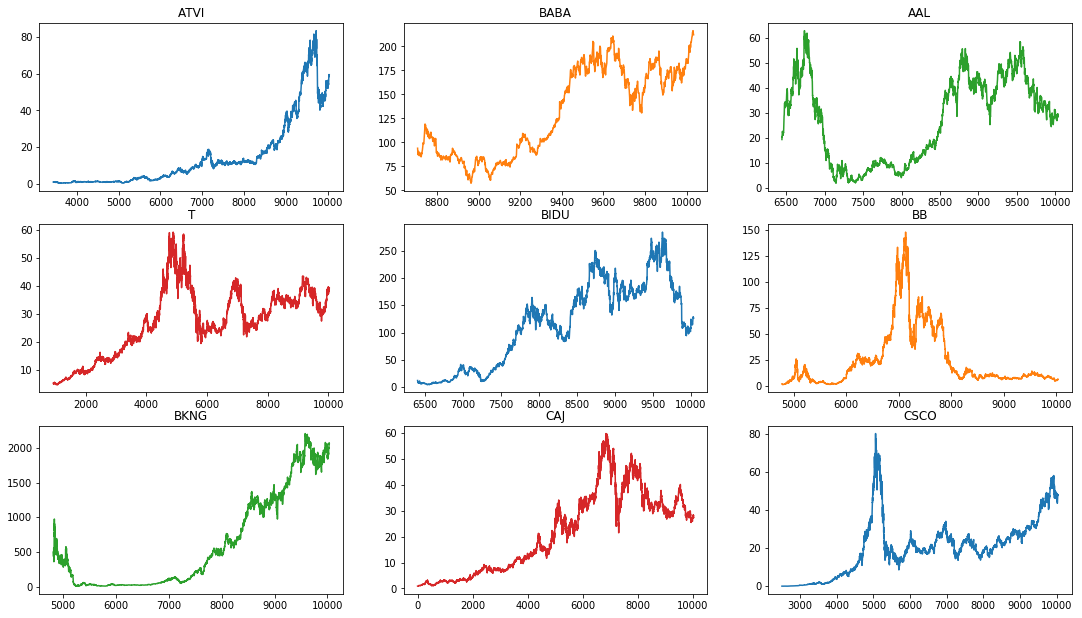

In [32]:

####!!!!
# TBD: Else to IF ELSE or smt different
#### !!!

def basic_plots(df,cols):

    fig, axs = plt.subplots(3, 3)

    ## TBD:
    # Automatizattion, or some improvement with dictionaries or wahtever
    
    if cols == "stocks":
    
        axs[0, 0].plot(df[stocks[0]], 'tab:blue')
        axs[0, 0].set_title(stocks[0])
        axs[0, 1].plot(df[stocks[1]], 'tab:orange')
        axs[0, 1].set_title(stocks[1])
        axs[0, 2].plot(df[stocks[2]], 'tab:green')
        axs[0, 2].set_title(stocks[2])
        axs[1, 0].plot(df[stocks[3]], 'tab:red')
        axs[1, 0].set_title(stocks[3])
        axs[1, 1].plot(df[stocks[4]], 'tab:blue')
        axs[1, 1].set_title(stocks[4])
        axs[1, 2].plot(df[stocks[5]], 'tab:orange')
        axs[1, 2].set_title(stocks[5])
        axs[2, 0].plot(df[stocks[6]], 'tab:green')
        axs[2, 0].set_title(stocks[6])
        axs[2, 1].plot(df[stocks[7]], 'tab:red')
        axs[2, 1].set_title(stocks[7])
        axs[2, 2].plot(df[stocks[8]], 'tab:blue')
        axs[2, 2].set_title(stocks[8])


        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        
    else:
            
        if cols == "returns":

            axs[0, 0].plot(df["Returns " + stocks[0]], 'tab:blue')
            axs[0, 0].set_title("Returns " + stocks[0])
            axs[0, 1].plot(df["Returns " + stocks[1]], 'tab:orange')
            axs[0, 1].set_title("Returns " + stocks[1])
            axs[0, 2].plot(df["Returns " + stocks[2]], 'tab:green')
            axs[0, 2].set_title("Returns " + stocks[2])
            axs[1, 0].plot(df["Returns " + stocks[3]], 'tab:red')
            axs[1, 0].set_title("Returns " + stocks[3])
            axs[1, 1].plot(df["Returns " + stocks[4]], 'tab:blue')
            axs[1, 1].set_title("Returns " + stocks[4])
            axs[1, 2].plot(df["Returns " + stocks[5]], 'tab:orange')
            axs[1, 2].set_title("Returns " + stocks[5])
            axs[2, 0].plot(df["Returns " + stocks[6]], 'tab:green')
            axs[2, 0].set_title("Returns " + stocks[6])
            axs[2, 1].plot(df["Returns " + stocks[7]], 'tab:red')
            axs[2, 1].set_title("Returns " + stocks[7])
            axs[2, 2].plot(df["Returns " + stocks[8]], 'tab:blue')
            axs[2, 2].set_title("Returns " + stocks[8])
            
            fig = plt.gcf()
            fig.set_size_inches(18.5, 10.5)
            
        else:
            pass
        
############## DATA: ##############

data = data

############## EXECUTION: ##############

#basic_plots(data, "stocks")
#basic_plots(data, "returns")

In [10]:
# Mixed plot

#for i in akcie:

#    display(plt.plot(data[i].dropna()))


### Time Series Description

In [120]:
data.describe()

,Mkt-RF,SMB,HML,RF
count,7631.000000,7631.000000,7631.000000,7631.000000
mean,0.022243,-0.004178,0.013200,0.009886
std,1.114969,0.591321,0.424833,0.008805
min,-8.980000,-5.160000,-4.180000,0.000000
25%,-0.500000,-0.290000,-0.190000,0.000000
50%,0.050000,0.010000,0.010000,0.010000
75%,0.580000,0.310000,0.210000,0.020000
max,10.760000,3.300000,3.760000,0.030000


## Load + Date + Plot + Stat + Difference + Plot
### For Data being already scraped  !!!!

,AAPL,AMZN,FB,GOOG,NFLX,NKE,SBUX,TSLA,XIACF,Returns AAPL,Returns AMZN,Returns FB,Returns GOOG,Returns NFLX,Returns NKE,Returns SBUX,Returns TSLA,Returns XIACF
count,9846.000000,5695.000000,1917.000000,3869.000000,4433.000000,9855.000000,6930.000000,2394.000000,342.000000,9844.000000,5694.000000,1916.000000,3868.000000,4432.000000,9854.000000,6929.000000,2393.000000,340.000000
mean,30.949929,322.774289,109.587903,489.695242,67.091110,15.384622,19.663245,183.153459,1.434621,0.001066,0.001891,0.001133,0.001027,0.001934,0.000873,0.001093,0.001719,-0.001225
std,54.750057,498.106391,56.890913,338.767985,103.232162,21.718307,22.267099,114.491831,0.311119,0.028635,0.037458,0.022787,0.018898,0.036516,0.021469,0.024072,0.032438,0.028607
min,0.196429,1.395833,17.730000,49.818268,0.372857,0.107422,0.335938,15.800000,1.080000,-0.518692,-0.247661,-0.189609,-0.116091,-0.409065,-0.198127,-0.282862,-0.193274,-0.148936
25%,1.067857,37.289999,63.189999,236.662933,3.700000,1.125000,3.200195,34.332501,1.170000,-0.013276,-0.013385,-0.009028,-0.007335,-0.014377,-0.009836,-0.010495,-0.014360,-0.014042
50%,1.718750,80.500000,109.889999,318.795074,13.328571,6.359375,10.235000,211.595001,1.346250,0.000000,0.000390,0.000966,0.000563,0.000312,0.000000,0.000000,0.000810,0.000000
75%,32.376786,324.964996,165.550003,719.409973,91.489998,17.336250,28.472500,263.889992,1.587500,0.014738,0.015113,0.011798,0.009795,0.017309,0.010603,0.011360,0.017851,0.009217
max,293.649994,2039.510010,217.500000,1361.170044,418.970001,101.570000,99.110001,430.940002,2.700000,0.332279,0.344714,0.296115,0.199915,0.422235,0.166669,0.183799,0.243951,0.173913


,AAPL,AMZN,FB,GOOG,NFLX,NKE,SBUX,TSLA,XIACF,Date2,Returns AAPL,Returns AMZN,Returns FB,Returns GOOG,Returns NFLX,Returns NKE,Returns SBUX,Returns TSLA,Returns XIACF
0,NaN,NaN,NaN,NaN,NaN,0.179688,NaN,NaN,NaN,1980-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.175781,NaN,NaN,NaN,1980-12-03,NaN,NaN,NaN,NaN,NaN,-0.021743,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.181641,NaN,NaN,NaN,1980-12-04,NaN,NaN,NaN,NaN,NaN,0.033337,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.171875,NaN,NaN,NaN,1980-12-05,NaN,NaN,NaN,NaN,NaN,-0.053765,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.162109,NaN,NaN,NaN,1980-12-08,NaN,NaN,NaN,NaN,NaN,-0.056820,NaN,NaN,NaN


,AAPL,AMZN,FB,GOOG,NFLX,NKE,SBUX,TSLA,XIACF,Date2,Returns AAPL,Returns AMZN,Returns FB,Returns GOOG,Returns NFLX,Returns NKE,Returns SBUX,Returns TSLA,Returns XIACF
9850,284.269989,1789.209961,205.119995,1343.560059,333.200012,100.139999,88.519997,425.250000,1.37,2019-12-24,0.000951,-0.002114,-0.005141,-0.003914,0.000300,0.001000,0.003287,0.014384,0.037879
9851,289.910004,1868.770020,207.789993,1360.400024,332.630005,100.709999,88.080002,430.940002,1.37,2019-12-26,0.019840,0.044467,0.013017,0.012534,-0.001711,0.005692,-0.004971,0.013380,0.000000
9852,289.799988,1869.800049,208.100006,1351.890015,329.089996,101.570000,88.129997,430.380005,1.39,2019-12-27,-0.000379,0.000551,0.001492,-0.006256,-0.010642,0.008539,0.000568,-0.001299,0.014599
9853,291.519989,1846.890015,204.410004,1336.140015,323.309998,100.800003,87.440002,414.700012,1.37,2019-12-30,0.005935,-0.012253,-0.017732,-0.011650,-0.017564,-0.007581,-0.007829,-0.036433,-0.014388
9854,293.649994,1847.839966,205.250000,1337.020020,323.570007,101.309998,87.919998,418.329987,1.38,2019-12-31,0.007307,0.000514,0.004109,0.000659,0.000804,0.005059,0.005489,0.008753,0.007299


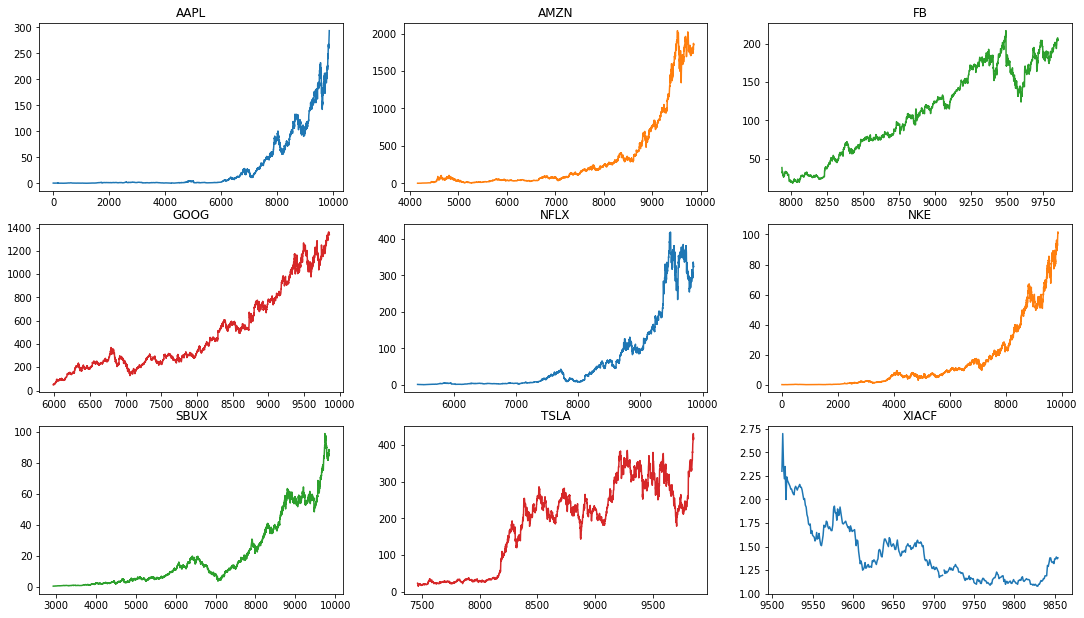

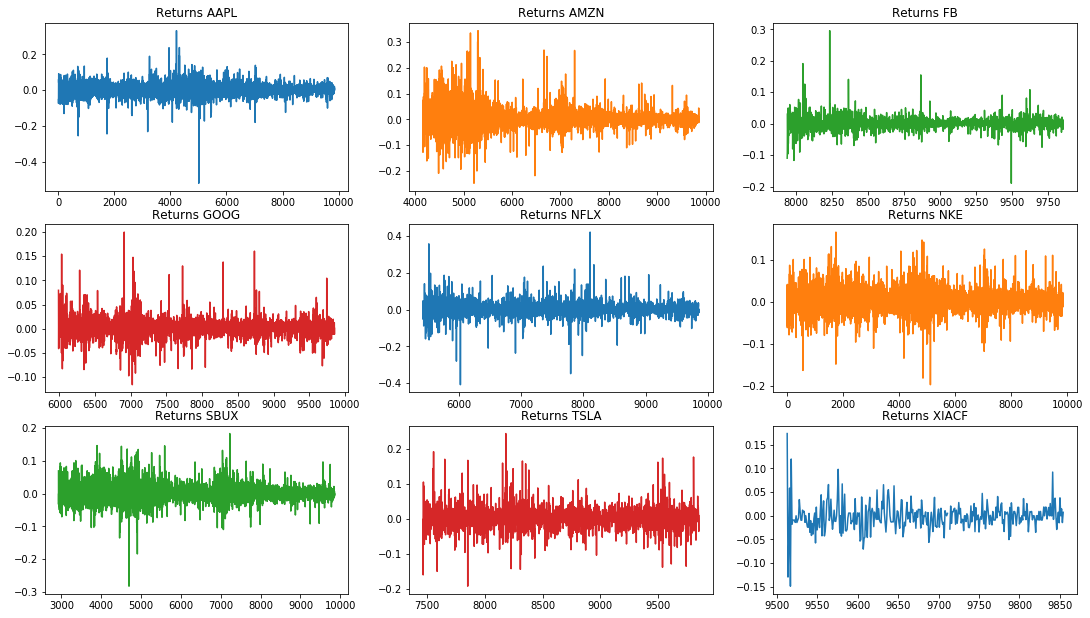

In [121]:

def load_date_plot_stat(path, price, stocks):
    
        df = diff_returns(date_all(load_all_csv(path, price, stocks)))
           
        display(df.describe())
        basic_plots(df, "stocks")
        basic_plots(df, "returns")
        return df

    # NOTE: {display, plot, return}
    # If I run function directly, all of the three above show up
    # If I run function as variable var = fce(), then return doesn't show up but I can call it via variable."smth"() were it is stored
    
#############################################################################   

path = "C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/stocks/"
price = "Close"
stocks = ["AAPL", "AMZN", "FB", "GOOG","NFLX", "NKE", "SBUX", "TSLA", "XIACF"]
#stocks = ["ATVI", "BABA", "AAL", "T","BIDU", "BB", "BKNG", "CAJ", "CSCO"]
#stocks = ["CLDR", "KO", "CROX", "DELL", "DAL", "DBX", "EBAY", "EA", "XOM"]

data = load_date_plot_stat(path, price, stocks)
display(data.head())
display(data.tail())

# Display(describe) runs automatically, followed by head & tail I specified after the function, and after that run PLOTS included in the function, maybe because it is inner function?


### Save the data

In [ ]:
# data.to_excel(r"data "+ akcie[0]+ " - " + akcie[len(akcie)-1] + " total_" + str(len(akcie)) + ".xlsx")

# 3. ARIMA

In [11]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA

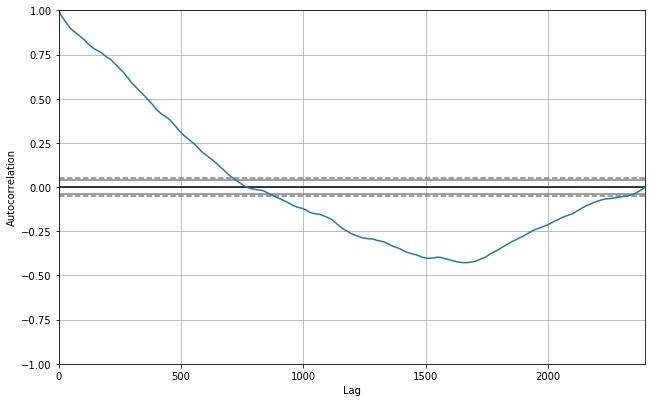

In [55]:
def autocorr_plots(df):

    autocorrelation_plot(data["TSLA"].dropna())

    fig = plt.gcf()
    fig.set_size_inches(10.5, 6.5)

    
autocorr_plots(data)


Jak vznikl předhoczí obrázek? nechybí mi tam kus kodu který to náhodou vytvořil????

In [44]:

# Datacamp:

data["Returns TSLA"].dropna().autocorr()


0.0037057604770755065

In [56]:
#autocorrelation_plot(data["AMZN"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns AMZN"].dropna())

In [ ]:
#autocorrelation_plot(data["AAPL"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns AAPL"].dropna())

In [ ]:
#autocorrelation_plot(data["FB"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns FB"].dropna())

In [ ]:
#autocorrelation_plot(data["GOOG"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns GOOG"].dropna())

In [ ]:
#autocorrelation_plot(data["NFLX"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns NFLX"].dropna())

In [ ]:
#autocorrelation_plot(data["NKE"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns NKE"].dropna())

In [ ]:
#autocorrelation_plot(data["SBUX"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns SBUX"].dropna())

In [ ]:
#autocorrelation_plot(data["TSLA"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns TSLA"].dropna())

In [ ]:
#autocorrelation_plot(data["XIACF"].dropna())

In [ ]:
#autocorrelation_plot(data["Returns XIACF"].dropna())

In [59]:
model = ARIMA(data["Returns TSLA"].dropna(), order=(2,1,2))    #(1,1,1) and (2,1,2) both gives interesting results
model_fit = model.fit(disp=0)                                  # Using Returns helps wit problem with stationarity
print(model_fit.summary()) 

C:\Users\jiri.zelenka\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jiri.zelenka\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Returns TSLA   No. Observations:                 2392
Model:                 ARIMA(2, 1, 2)   Log Likelihood                4803.439
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 05 Mar 2020   AIC                          -9594.877
Time:                        17:03:49   BIC                          -9560.198
Sample:                             1   HQIC                         -9582.259
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.449e-07   9.73e-07     -0.663      0.507   -2.55e-06    1.26e-06
ar.L1.D.Returns TSLA    -0.9834      0.024    -40.913      0.000      -1.030      -0.936
ar.L2.D.Retu

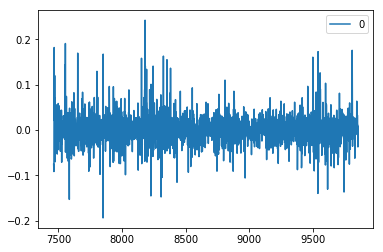

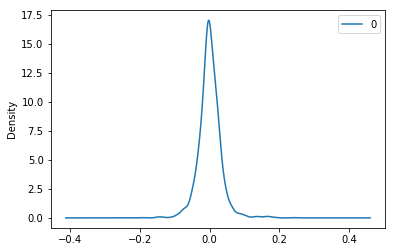

                 0
count  2392.000000
mean      0.000476
std       0.032591
min      -0.194267
25%      -0.015603
50%      -0.000555
75%       0.016477
max       0.242346


In [19]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# 4. Factors

### Scrapping factors
## THIS PART CAN BE SKIPPED TO "Load Factors as CSV" !!!

In [98]:
import zipfile

with zipfile.ZipFile("C:/Users/jiri.zelenka/Downloads/F-F_Research_Data_Factors_CSV.zip", 'r') as zip_ref:
    zip_ref.extractall("C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors")

### Loading CSV with correct header

#### Not working for me:

In [21]:
################################################################################################################################################x
import csv
reader = csv.DictReader(open("C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Five_factors_EU_daily.csv"))
"""if reader.fieldnames[0][0] == "T":
    df7 = pd.read_csv("C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Five_factors_EU_daily.csv", skiprows = 1)
else:
    pass
df7
"""

print(reader.fieldnames[0])


"""
i=1

while reader.fieldnames[0][0] != ",":
    i = i+1
    print(i)"""

## kjk
################################################################################################################################################x
with open("C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Five_factors_EU_daily.csv", 'r') as f:
    d_reader = csv.DictReader(f)

    #get fieldnames from DictReader object and store in list
    headers = d_reader.fieldnames

    for line in d_reader:
        #print value in MyCol1 for each row
        print(line)
################################################################################################################################################x
with open("C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Five_factors_EU_daily.csv", 'r') as f:
    #you can eat the first line before creating DictReader.
    #if no "fieldnames" param is passed into
    #DictReader object upon creation, DictReader
    #will read the upper-most line as the headers
    f.readline()

    d_reader = csv.DictReader(f)
    for row in d_reader:
        print(row)
################################################################################################################################################x
df7 = pd.read_csv("C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Five_factors_US_daily.csv", skiprows = 2, header = None)
display(type(df7.iloc[0].iloc[0])==str)
display(df7[0][0])
display(df7.iloc[0].iloc[0])
df7.head()

# Kombinace skip = 12, header = None mi nefunguje na Momentum_US_daily, protože tam pak [0][0] nemám žádný string, jen na [1][0]
# jinak skiprows + header = None fungovala snad na všechno.
# Pro změnu kombinace úplně bez headeru mi zase nefunguje na monthly data ,které jsou celé string.

################################################################################################################################################
i = 0
path = "C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Momentum_US_daily.csv"

while True :
    try:
        df = pd.read_csv(path, skiprows = i, header = None)
        
        if df.iloc[0].iloc[0] in ["RF", "CMA"]:          # Jeden z problémů: Nejde použít STRING, protože v EU_monthly jsou i čísla jako stringy...// v Momentum taky.. ?
            i = i+1                                  # Takže budu muset zůstat u detekce RF a CMA .... smutné ale je to tak
        else:
            data = pd.read_csv(path , skiprows = i, header = None)
            break
    except:
        i = i+1
        
data.head(15)

This file was created using the 201909 Bloomberg database.
OrderedDict([('This file was created using the 201909 Bloomberg database.', 'Missing data are indicated by -99.99.')])
OrderedDict([('This file was created using the 201909 Bloomberg database.', ''), (None, ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'])])
OrderedDict([('This file was created using the 201909 Bloomberg database.', '19900702    '), (None, ['0.99    ', '0.01   ', '-0.53    ', '0.41   ', '-0.25    ', '0.03'])])
OrderedDict([('This file was created using the 201909 Bloomberg database.', '19900703    '), (None, ['0.33   ', '-0.09   ', '-0.03    ', '0.05    ', '0.27    ', '0.03'])])
OrderedDict([('This file was created using the 201909 Bloomberg database.', '19900704    '), (None, ['0.24    ', '0.01   ', '-0.14   ', '-0.10    ', '0.23    ', '0.03'])])
OrderedDict([('This file was created using the 201909 Bloomberg database.', '19900705   '), (None, ['-0.64    ', '0.20    ', '0.06   ', '-0.32    ', '0.08    ', '0.03'])]

False

nan

nan

,0,1,2
0,using independent sorts on size and prior retu...,AMEX,and NASDAQ stocks.
1,MOM is the average of the returns on two (big ...,NaN,NaN
2,minus the average of the returns on two low pr...,NaN,NaN
3,are constructed daily. Big means a firm is ab...,NaN,NaN
4,at the end of the previous day; small firms ar...,NaN,NaN
5,Prior return is measured from day - 250 to - 2...,NaN,NaN
6,portfolio are below the 30th NYSE percentile. ...,NaN,NaN
7,the 70th NYSE percentile.,NaN,NaN
8,Missing data are indicated by -99.99 or -999.,NaN,NaN
9,NaN,Mom,NaN


#### Finally working for me:

In [122]:

def find_header_and_load(full_path):

    pos= 0
    oldpos = None

    with open(full_path, 'r') as fp:

        while pos != oldpos:  # make sure we stop reading, in case we reach EOF
            line= fp.readline()
            if line.startswith(","):
                fp.seek(pos)                  
                break
            oldpos = pos 
            pos = fp.tell()    # remember this position as the start of the next line 

        df = pd.read_csv(fp)
        
    return df


############## DATA: ##############

# Seek and Tell:
# https://www.youtube.com/watch?v=SEURXzTgvKI
# https://stackoverflow.com/questions/14881885/python-pandas-read-csv-file-with-variable-preamble-length?fbclid=IwAR166rOeOxm16qJ7NWoB_tHz1M9JgfCIlORcsY3JaT0NNc5HYMObjRTzhpc

#fullpath = "C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Three_factors_EU_daily.csv"
    # Use daily to get OK data !!!
    # Monthly contain another non-prepared yearly data
fullpath = "C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/Three_factors_EU_Daily.csv"
   
############## EXECUTION: ##############

data = find_header_and_load(fullpath)
display(data.tail())



,Unnamed: 0,Mkt-RF,SMB,HML,RF
7626,20190924,0.12,0.09,-0.63,0.01
7627,20190925,-1.27,-0.33,0.51,0.01
7628,20190926,0.34,-0.48,-0.39,0.01
7629,20190927,0.54,-0.19,0.28,0.01
7630,20190930,-0.02,-0.01,-0.03,0.01


In [102]:

def format_date_daily(df):

    df = df.rename(columns={'Unnamed: 0': 'Date'})
    df['Date'] = df['Date'].apply(str)
    
    try:                                                                 

        df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))      
   
    except:
        df = df[0:len(df)-1]                                                     #### Kvůli tomu, že některé soubory měly na konci řádek s copyrightem tkerý je třeba umazat
        df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))  
        
    return df

        # Tough time, strtime vs. strftime, string conversion, deleting /no etc.,
    # APPLY LAMBDA worked perfectly

############## DATA: ##############

data = data

############## EXECUTION: ##############

data = format_date_daily(data)
data.tail()

,Date,Mkt-RF,SMB,HML,RF
7626,2019-09-24,0.12,0.09,-0.63,0.01
7627,2019-09-25,-1.27,-0.33,0.51,0.01
7628,2019-09-26,0.34,-0.48,-0.39,0.01
7629,2019-09-27,0.54,-0.19,0.28,0.01
7630,2019-09-30,-0.02,-0.01,-0.03,0.01


In [ ]:
#
#
# Problematic part
#
#

In [ ]:
data.tail(50)

In [88]:
def format_date_monthly_1(df):
    
    end = df[df["Mkt-RF"].isna()].index.tolist()
    df = df.iloc[0:end[0]]
    
    return df

a = format_date_monthly_1(data)
a.tail()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
348,201907,-2.56,-1.28,0.04,0.19
349,201908,-2.39,-0.61,-1.91,0.16
350,201909,2.15,-0.86,3.08,0.18
351,201910,3.26,0.96,-0.51,0.15
352,201911,1.78,2.05,-2.29,0.12


In [89]:
def format_date_monthly_2(df):
    df = df.rename(columns={'Unnamed: 0': 'Date'})
    df['Date'] = df['Date'].apply(str)
    
    try:                                #### Because some files were finished with Copyright row that needs to be deleted
        df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y%m'))      
   
    except:
        df = df[0:len(df)-1]                 
        df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y%m'))  
        
    return df

b = format_date_monthly_2(a)
b.tail()

ValueError: unconverted data remains:     

In [ ]:
end = data[data["Mkt-RF"].isna()].index.tolist()
end

In [97]:


# Tohle mi blbne, ovčas to jdem ale ty dva řády s end bych rád vecpal do funkce ale uniká mi posloupnost akcí...


def format_date_monthly(df):
    
    end = df[df["Mkt-RF"].isna()].index.tolist()
    df = df.iloc[0:end[0]]
    
    df = df.rename(columns={'Unnamed: 0': 'Date'})
    df['Date'] = df['Date'].apply(str)
    
    try:                                #### Because some files were finished with Copyright row that needs to be deleted
        df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y%m'))      
   
    except:
        df = df[0:len(df)-1]                 
        df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y%m'))  
        
    return df

end = data[data["Mkt-RF"].isna()].index.tolist()
data = data.iloc[0:end[0]]

#############################################################################
data = data

data2 = format_date_monthly(data)
data2.tail()

IndexError: list index out of range

In [103]:
#     
#     
# Problematic part
#
#

### Loading factors as CSV

In [123]:

def factors_load(path, country, freq):
    
    if country == "EU":
        i = "EU"
    elif country == "US":
        i = "US"
    else:
        pass

    if freq == "daily":
        j = "daily"
    elif freq == "monthly":
        j = "monthly"
    else:
        pass


    fullpath1 = path + "Five_factors_" + i + "_" + j +".csv"
    fullpath2 = path +  "Momentum_" + i + "_" + j +".csv"
    fullpath3 = path + "Three_factors_" + i + "_" + j +".csv"
    
    if freq == "daily":
        df1 = format_date_daily(find_header_and_load(fullpath1))
        df2 = format_date_daily(find_header_and_load(fullpath2))
        df3 = format_date_daily(find_header_and_load(fullpath3))

        
    elif freq == "monthly":
        df1 = format_date_monthly(find_header_and_load(fullpath1))
        df2 = format_date_monthly(find_header_and_load(fullpath2))
        df3 = format_date_monthly(find_header_and_load(fullpath3)) 
    
    else:
        print("ERROR")
        
    return df1, df2, df3

############## DATA: ##############

path = "C:/Users/jiri.zelenka/Desktop/Python/Akcie_diplomka/factors/"

############## EXECUTION: ##############

factors = factors_load(path, "EU", "daily")     # Actually works with EU daily and US daily.
                                                # Problem with other 2 combinations - there are some space-separated extra data rows
three = factors[2]
four = factors[1]
five = factors[0]


In [124]:
display(three.head())
display(four.head())
display(five.head())

display(three.tail())
display(four.tail())
display(five.tail())


,Date,Mkt-RF,SMB,HML,RF
0,1990-07-02,0.99,0.05,-0.53,0.03
1,1990-07-03,0.33,-0.12,-0.03,0.03
2,1990-07-04,0.24,-0.01,-0.14,0.03
3,1990-07-05,-0.64,0.19,0.06,0.03
4,1990-07-06,0.08,-0.19,0.14,0.03


,Date,WML
0,1990-11-01,0.24
1,1990-11-02,0.32
2,1990-11-05,0.47
3,1990-11-06,0.56
4,1990-11-07,0.34


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1990-07-02,0.99,0.01,-0.53,0.41,-0.25,0.03
1,1990-07-03,0.33,-0.09,-0.03,0.05,0.27,0.03
2,1990-07-04,0.24,0.01,-0.14,-0.10,0.23,0.03
3,1990-07-05,-0.64,0.20,0.06,-0.32,0.08,0.03
4,1990-07-06,0.08,-0.24,0.14,0.02,0.13,0.03


,Date,Mkt-RF,SMB,HML,RF
7626,2019-09-24,0.12,0.09,-0.63,0.01
7627,2019-09-25,-1.27,-0.33,0.51,0.01
7628,2019-09-26,0.34,-0.48,-0.39,0.01
7629,2019-09-27,0.54,-0.19,0.28,0.01
7630,2019-09-30,-0.02,-0.01,-0.03,0.01


,Date,WML
7538,2019-09-24,1.11
7539,2019-09-25,-0.17
7540,2019-09-26,0.89
7541,2019-09-27,-0.70
7542,2019-09-30,-0.03


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
7626,2019-09-24,0.12,0.06,-0.63,0.13,-0.23,0.01
7627,2019-09-25,-1.27,-0.32,0.51,-0.32,0.21,0.01
7628,2019-09-26,0.34,-0.52,-0.39,0.08,-0.27,0.01
7629,2019-09-27,0.54,-0.17,0.28,0.00,0.15,0.01
7630,2019-09-30,-0.02,-0.01,-0.03,-0.05,-0.19,0.01


In [125]:

length = min(len(three), len(four), len(five))
 # This part cuts all the factors to the same amtching length

"""for i in (three, four, five):
    
    i = i.iloc[::-1]
    i = i[0:length]
    i = i.iloc[::-1]
   """

three = three.iloc[::-1]    # Reverse order
three = three[0:length]     # Cutting length
three = three.iloc[::-1]    # Reverse order again

four = four.iloc[::-1]
four = four[0:length]
four = four.iloc[::-1]

five = five.iloc[::-1]
five = five[0:length]
five = five.iloc[::-1]

for i in (three, four, five):
    i = i[0:length]
    print(len(i))
    

four = pd.concat([three, four["WML"]], axis=1)
four = four[["Mkt-RF", "SMB", "HML","WML", "RF"]]
                # A this moment, 4 factors are based on the 3 factors


7543
7543
7543


## Save the data

In [117]:
#three.to_excel(r"three.xlsx")
#four.to_excel(r"four.xlsx")
#five.to_excel(r"five.xlsx")

In [118]:
data

,Date,Mkt-RF,SMB,HML,RF
0,1990-07-02,0.99,0.05,-0.53,0.03
1,1990-07-03,0.33,-0.12,-0.03,0.03
2,1990-07-04,0.24,-0.01,-0.14,0.03
3,1990-07-05,-0.64,0.19,0.06,0.03
4,1990-07-06,0.08,-0.19,0.14,0.03
5,1990-07-09,0.49,0.03,-0.27,0.03
6,1990-07-10,0.01,0.36,-0.39,0.03
7,1990-07-11,-0.34,-0.49,-0.05,0.03
8,1990-07-12,0.61,-0.16,-0.02,0.03
9,1990-07-13,0.48,-0.61,0.03,0.03


# 5. Regression

In [ ]:

def prepare_OLS(stocks, data, num_factors, split):
    
    if num_factors == "three":
        factors = [ "Mkt-RF", "SMB", "HML"]
        num_factors = three
    else:
        if num_factors == "four":
            factors = [ "Mkt-RF", "SMB", "HML", "WML"]
            num_factors = four
        else:
            if num_factors == "five":
                factors = [ "Mkt-RF", "SMB", "HML", "RMW", "CMA"]
                num_factors = five
            else:
                pass        
    
    
    
    for i in stocks:
        returns =  data[["Date2","Returns " + i ]]
        returns = returns.set_index('Date2')

        merged = returns.merge(num_factors, left_index=True, right_index=True, how='inner')
        data2 = merged.dropna()                    
 #      data2 = data2[len(data2)-100:len(data2)]    ### This is only the end of the series, better R2 - around 20 %
            
        data2["EXCESS"] = data2["Returns " + i] - data2["RF"]
        
        X = data2[factors]      ################ Tady to musím poladit asi IFem ,,,
        y = data2[["EXCESS"]]
        
        #plt.plot(y[len(y)-10:len(y)])            ###########x Tady pořád mi jde vykreslovat jen pár hodnot
        #plt.show()                             ############# Subploty ještě pořád nevím jak dodělám
        

        split = split

        train_X = X[0:round(split*len(X))]
        train_y = y[0:round(split*len(y))]

        test_X = X[round(split*len(X)):]
        test_y = y[round(split*len(y)):]
        
        model = sm.OLS(train_y, train_X).fit()
        predictions = model.predict(test_X) 
        #display(model.summary())                  ###### Celé summary asi nepotřebuju
        display("R2: ", model.rsquared)
        rms = sqrt(mean_squared_error(test_y, predictions))
        display("RMSE: ", rms)
        display("Length: ", len(data2))                                                 
            
        plt.plot(y[len(y)-100:len(y)])
        plt.plot(predictions[len(predictions)-100:len(predictions)], color='red')

        #fig = plt.gcf()
        #fig.set_size_inches(10, 8)

        plt.show()
        
############## DATA: ##############

stocks = ["AAPL", "AMZN", "FB", "GOOG","NFLX", "NKE", "SBUX", "TSLA", "XIACF"]
#stocks = ["ATVI", "BABA", "AAL", "T","BIDU", "BB", "BKNG", "CAJ", "CSCO"]
#stocks = ["CLDR", "KO", "CROX", "DELL", "DAL", "DBX", "EBAY", "EA", "XOM"]

############## EXECUTION: ##############

prepare_OLS(stocks = stocks, data = data, num_factors = "three", split = 0.8)

# Note: R2 goes well only on the 100 last observations, otherwise it is around 0.07 ...


# 6. LSTM - simple time series

In [127]:
np.random.seed(7)

y = y.values
y = y.astype('float32')

y = y.reshape(-1, 1)   

# normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
y = scaler.fit_transform(y)

# split into train and test sets

splitty = 0.8

train_size = int(len(y) * splitty) 
test_size = len(y) - train_size    
train = y[0:train_size, :]
test = y[train_size:len(y), :] 
display(len(train), len(test))

def create_dataset(dataset, look_back=10):        
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):   
        a = dataset[i:(i+look_back), 0]         
        dataX.append(a)                         
        dataY.append(dataset[i + look_back, 0]) 
    return np.array(dataX), np.array(dataY)
                                             

# reshape into X=t and Y=t+1
look_back = 5
train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(4))    # Přidána nová vrstva...
model.add(Dense(1))    
model.compile(loss='mean_squared_error', optimizer='adam')

# Activation = RELU?
#8 = ??
# v druhém Lstm nemám druhou vrstvu 
# taky tam mám batch 72 místo 1 ...



model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2)

### # make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)



# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
train_y = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
test_y = scaler.inverse_transform([test_y])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train_y[0], trainPredict[:,0]))
print('Train Score: %.6f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(test_y[0], testPredict[:,0]))
print('Test Score: %.6f RMSE' % (testScore))


                                                                   
# shift train predictions for plotting
"""trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict     # úsek [5:37] naplň 32 hodnotami predikce
"""
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(y)-1, :] = testPredict 

# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
"""plt.plot(trainPredictPlot) """

plt.plot(testPredictPlot, color = "green")    #LSTM - začíná o pět tahů později kvůli "lagu"
plt.plot(predictions, color='red')            #Regrese


plt.show()



# Detail na konec setu

plt.plot(scaler.inverse_transform(y))
plt.plot(testPredictPlot, color = "green")    #LSTM - začíná o pět tahů později kvůli "lagu"
plt.plot(predictions, color='red')            #Regrese

plt.xlim(len(X)*splitty-5,len(X))   
plt.ylim(-0.12, 0.11)

fig = plt.gcf()
fig.set_size_inches(10, 8)
# fig.savefig('test2png.png', dpi=100)

plt.show()


NameError: name 'y' is not defined

# 7. LSTM - time series + factors